# =============================
# BÀI TẬP 1: Mô hình cây quyết định cho hệ khuyến nghị
# =============================

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
import zipfile

In [2]:
ml_100k_url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
ml_100k_zip = 'ml-100k.zip'
ml_100k_folder = 'ml-100k'

if not os.path.exists(ml_100k_folder):
    if not os.path.exists(ml_100k_zip):
        print('Downloading MovieLens 100K dataset...')
        urllib.request.urlretrieve(ml_100k_url, ml_100k_zip)
    print('Extracting MovieLens 100K dataset...')
    with zipfile.ZipFile(ml_100k_zip, 'r') as zip_ref:
        zip_ref.extractall('.')

# Đọc dữ liệu đánh giá
ratings_cols = ['userID', 'itemID', 'rating', 'timestamp']
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Đọc thông tin người dùng
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

# Đọc thông tin phim
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date',
               'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
               'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

Extracting MovieLens 100K dataset...


In [3]:
ratings_df.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


from matplotlib import pyplot as plt
_df_0['userID'].plot(kind='hist', bins=20, title='userID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['itemID'].plot(kind='hist', bins=20, title='itemID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='userID', y='itemID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='itemID', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['userID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('userID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['itemID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('itemID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['userID'].plot(kind='line', figsize=(8, 4), title='userID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['itemID'].plot(kind='line', figsize=(8, 4), title='itemID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
users[users["user_id"] == 186]

,user_id,age,gender,occupation,zip_code
185,186,39,F,executive,00000


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'age'}, axis=1)
              .sort_values('age', ascending=True))
  xs = counted['age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age')
_ = plt.ylabel('count()')

In [5]:
movies[movies["movie_id"] == 243]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
242,243,Jungle2Jungle (1997),07-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Jungle2Jungle...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len(users.occupation.unique())

21

In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=ratings_df)

https://docs.google.com/spreadsheets/d/1JVMEkMh8RRus3NyE_dI-ZZlol-VwnGXakHmnI_6RJxU/edit#gid=0


In [9]:
# TODO: Tiền xử lý dữ liệu
# 1. Chuyển đổi đặc trưng phân loại (gender, occupation) thành one-hot encoding
users_processed = users.copy()
users_processed = pd.get_dummies(users_processed, columns=['gender', 'occupation'])
users_processed[users_processed["user_id"] == 186]

,user_id,age,zip_code,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
185,186,39,00000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# TODO: Tạo biến mục tiêu (thích/không thích)
# Tạo biến ratings_merged bằng cách nối các bảng
ratings_merged = pd.merge(ratings_df, users, left_on='userID', right_on='user_id')
ratings_merged = pd.merge(ratings_merged, movies, left_on='itemID', right_on='movie_id')

# Tạo cột mục tiêu 'liked' dựa trên rating
if 'rating' in ratings_merged.columns:
    ratings_merged['liked'] = (ratings_merged['rating'] >= 4).astype(int)
else:
    raise KeyError("⚠️ Không tìm thấy cột 'rating' trong ratings_merged để tạo cột 'liked'.")

# Kiểm tra
print("✅ Tạo xong cột 'liked'. Các cột hiện có:", ratings_merged.columns.tolist())
print("📊 Xem dữ liệu:")
print(ratings_merged[['userID', 'itemID', 'rating', 'liked']].head())

✅ Tạo xong cột 'liked'. Các cột hiện có: ['userID', 'itemID', 'rating', 'timestamp', 'user_id', 'age', 'gender', 'occupation', 'zip_code', 'movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'liked']
📊 Xem dữ liệu:
   userID  itemID  rating  liked
0     196     242       3      0
1     186     302       3      0
2      22     377       1      0
3     244      51       2      0
4     166     346       1      0


In [15]:
# TODO: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# One-hot encoding cho các cột phân loại trong users
users_encoded = pd.get_dummies(users[['user_id', 'age', 'gender', 'occupation']], columns=['gender', 'occupation'])

# Kết hợp users_encoded vào ratings_merged
ratings_merged = pd.merge(ratings_df, users_encoded, left_on='userID', right_on='user_id')
ratings_merged = pd.merge(ratings_merged, movies, left_on='itemID', right_on='movie_id')

# Tạo biến mục tiêu
ratings_merged['liked'] = (ratings_merged['rating'] >= 4).astype(int)

# Tạo biến mục tiêu
ratings_merged['liked'] = (ratings_merged['rating'] >= 4).astype(int)

# Xây dựng danh sách các biến đầu vào
feature_cols = ['age'] + list(users_encoded.columns.drop(['user_id'])) + [
    'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Thriller', 'War', 'Western'
]

# Kiểm tra xem các cột có đủ không
for col in feature_cols:
    if col not in ratings_merged.columns:
        raise KeyError(f"⚠️ Thiếu cột '{col}' trong ratings_merged. Kiểm tra lại việc merge hoặc xử lý dữ liệu.")

# Tách dữ liệu
X = ratings_merged[feature_cols]
y = ratings_merged['liked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
print("📋 Xem bảng ratings_merged (sau khi merge và thêm 'liked'):")
display(ratings_merged.head())

📋 Xem bảng ratings_merged (sau khi merge và thêm 'liked'):


,userID,itemID,rating,timestamp,user_id,age,gender_F,gender_M,occupation_administrator,occupation_artist,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,liked
0,196,242,3,881250949,196,49,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,186,39,True,False,False,False,...,1,0,0,1,0,0,1,0,0,0
2,22,377,1,878887116,22,25,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,244,28,False,True,False,False,...,0,0,0,0,1,0,0,1,1,0
4,166,346,1,886397596,166,47,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print("🧾 Các đặc trưng (X):")
display(X.head())

print("✅ Nhãn mục tiêu (y):")
display(y.head())

🧾 Các đặc trưng (X):


,age,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,49,49,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,39,39,True,False,False,False,False,False,False,False,...,0,1,0,0,1,0,0,1,0,0
2,25,25,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,28,28,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,1,1
4,47,47,False,True,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0


✅ Nhãn mục tiêu (y):


,liked
0,0
1,0
2,0
3,0
4,0


In [18]:
print("🔹 X_train:")
display(X_train.head())

print("🔸 y_train:")
display(y_train.head())

🔹 X_train:


,age,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
75220,41,41,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
48955,51,51,False,True,False,False,False,False,False,False,...,0,0,0,0,1,0,0,1,0,0
44966,48,48,True,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
13568,20,20,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,1,0
92727,17,17,False,True,False,False,False,False,False,False,...,0,0,0,0,0,1,0,1,0,0


🔸 y_train:


,liked
75220,0
48955,1
44966,1
13568,1
92727,1


In [19]:
# TODO: Xây dựng và huấn luyện mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.5656
Precision: 0.5600417318727178
Recall: 0.9768880800727935
F1 Score: 0.7119363395225464


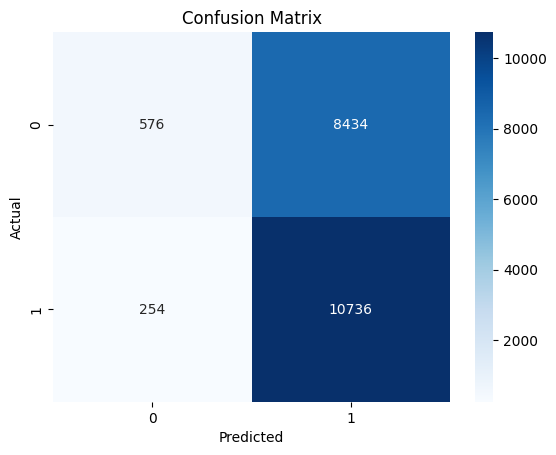

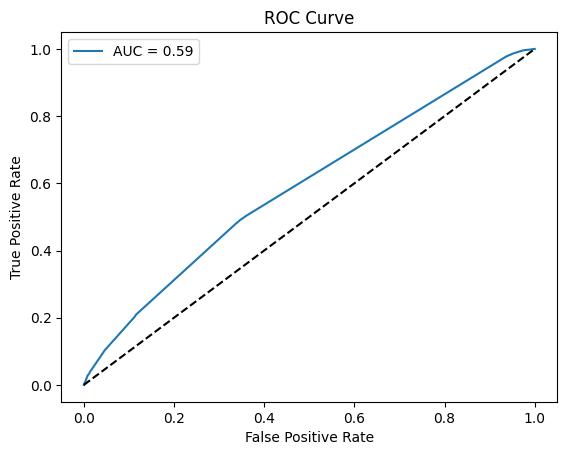

In [20]:
# TODO: Đánh giá hiệu suất mô hình
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()





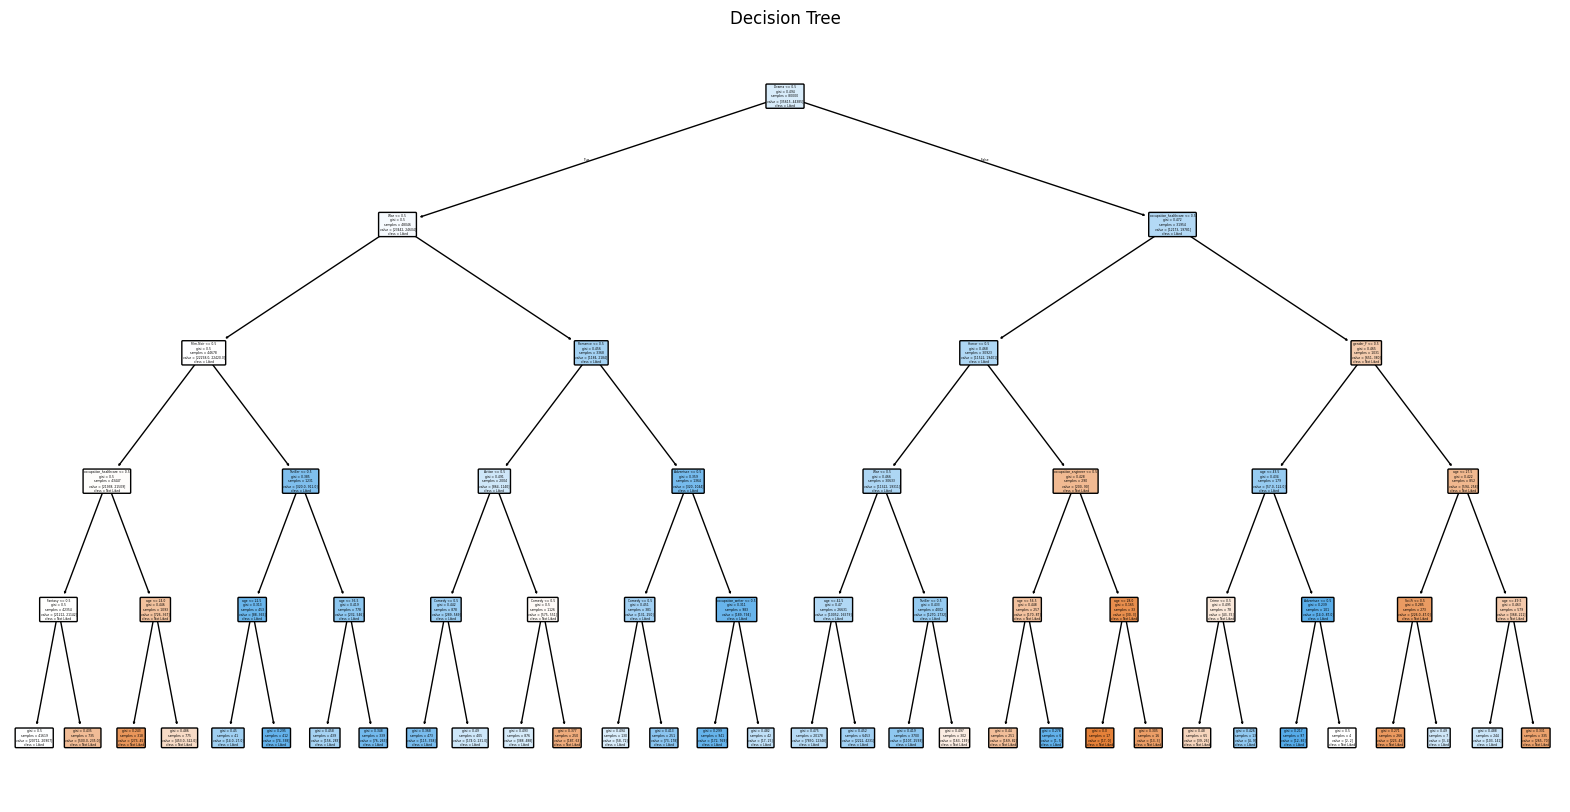

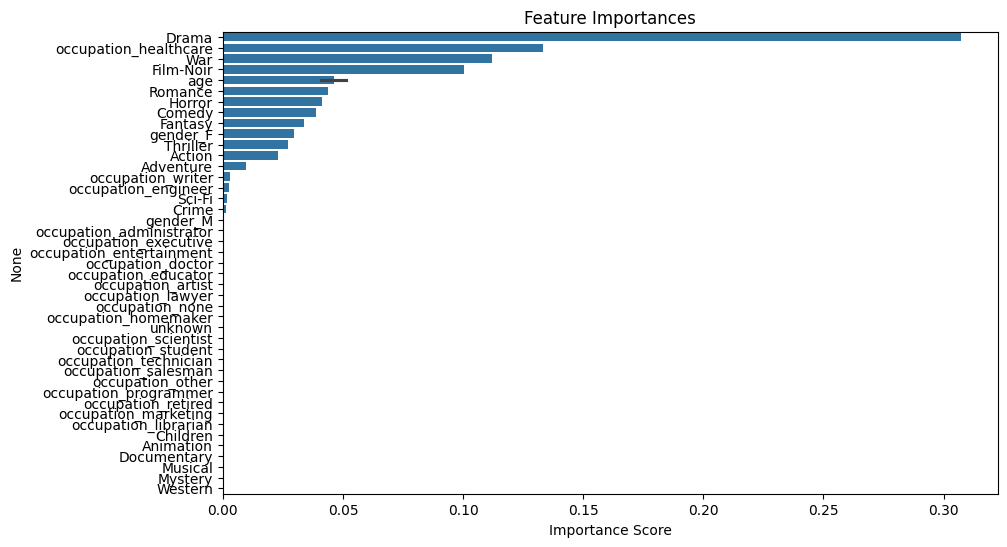

In [21]:
# TODO: Trực quan hóa cây quyết định và phân tích đặc trưng quan trọng
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_cols, class_names=['Not Liked', 'Liked'], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

importances = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()

